### Resume Categorizationnnn

Ok so in this notebook, i did some data handling, visualization and modelling with this dataset that i got from kaggle, it has resumes categorized into different fields, i trained a random forest classifier using TF-IDF for text encoding and the evaluated it and then tested its predictiveness with custom input.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("noorsaeed/resume-datasets")

print("Path to dataset files:", path)


C:\Users\npyes\OneDrive\Desktop\Personal-Projects\hiremeow-lt\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|███████████████████████████████████████████████████████████████████████████████| 142M/142M [00:38<00:00, 3.86MB/s]

Extracting files...


Path to dataset files: C:\Users\npyes\.cache\kagglehub\datasets\noorsaeed\resume-datasets\versions\1


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
clean_df = pd.read_csv(r'C:\Users\npyes\.cache\kagglehub\datasets\noorsaeed\resume-datasets\versions\1\clean_resume_data.csv')
clean_df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [7]:
clean_df.shape

(2484, 3)

### EDA

In [8]:
clean_df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

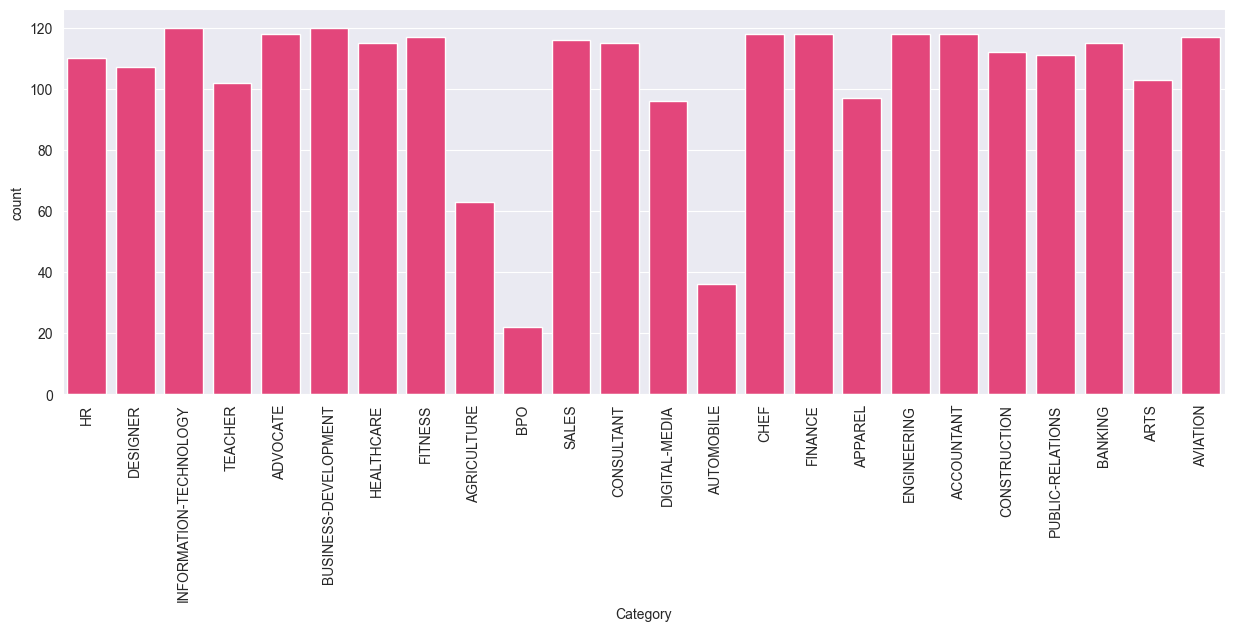

In [12]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Category', data=clean_df, color='#FD2C72') #yayyy pink
plt.xticks(rotation=90)
plt.show()


Some categories have less data and that needs to be balanced out cus the ones with more data might dominate.

### Balance Data

In [14]:
clean_df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [52]:
from sklearn.utils import resample

max_count = clean_df['Category'].value_counts().max()

balanced_data = []
for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

balanced_df = pd.concat(balanced_data)

So this code either duplicates the smaller ones (oversampling) or trims the bigger ones (undersampling) to make sure every category has the same number of samples.

In [31]:
balanced_df['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
INFORMATION-TECHNOLOGY    120
TEACHER                   120
ADVOCATE                  120
BUSINESS-DEVELOPMENT      120
HEALTHCARE                120
FITNESS                   120
AGRICULTURE               120
BPO                       120
SALES                     120
CONSULTANT                120
DIGITAL-MEDIA             120
AUTOMOBILE                120
CHEF                      120
FINANCE                   120
APPAREL                   120
ENGINEERING               120
ACCOUNTANT                120
CONSTRUCTION              120
PUBLIC-RELATIONS          120
BANKING                   120
ARTS                      120
AVIATION                  120
Name: count, dtype: int64

yayyyy it workeddd

In [32]:
balanced_df.isnull().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [33]:
#ok lets drop that
balanced_df.dropna(inplace=True)

### Train Test Split

In [35]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TF-IDF

In [36]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### Random Forestttt

In [38]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Accuracyyyy 
y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8541666666666666


In [39]:
#85% is pretty good so imma just use this.

print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.79      0.90      0.84        21
              ADVOCATE       1.00      0.69      0.82        29
           AGRICULTURE       0.95      0.78      0.86        23
               APPAREL       0.95      0.86      0.90        21
                  ARTS       1.00      0.77      0.87        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.91      1.00      0.95        30
               BANKING       0.86      0.83      0.84        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.52      0.61      0.56        18
                  CHEF       0.90      0.96      0.93        28
          CONSTRUCTION       0.89      1.00      0.94        25
            CONSULTANT       0.96      0.71      0.81        31
              DESIGNER       0.96      0.86      0.91        28
         DIGITAL-MEDIA       0.77      

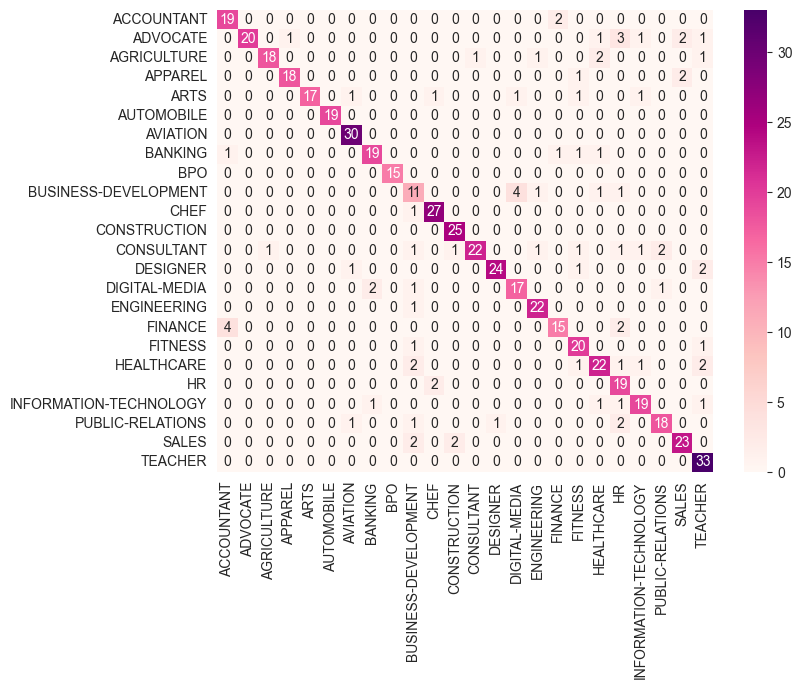

In [41]:
# ok noice

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.show()


its so pretty, ok but i think the model has done really well at predicting the right categories, theres jsut some really small errors here and there with finance accountants advocate etc. but overall its working well.

### Custom Input Prediction

In [44]:
import re

def clean_resume(txt):
    txt = re.sub(r'http\S+|www\S+|https\S+', ' ', txt)
    txt = re.sub(r'\S+@\S+', ' ', txt)  # email
    txt = re.sub(r'\+?\d[\d\s]{8,}', ' ', txt)  # phone numbers
    txt = re.sub(r'\bRT\b|cc', ' ', txt)
    txt = re.sub(r'@\w+|#\w+', ' ', txt)
    txt = re.sub(r'[^\x00-\x7F]+', ' ', txt)  # non-ASCII
    txt = re.sub(r'[!"#$%&\'()*+,\-./:;<=>?@[\\\]^_`{|}~]', ' ', txt)
    txt = re.sub(r'\s+', ' ', txt).strip()
    return txt

yeshi = "Yeshaswi Prakash +91 90254 16053 npyeshaswi@gmail.com 1 YOE | Software Developer | 4x Hackathon Winner | 3rd Yr @ SRMIST EXPERIENCE Headstarter AI, Remote — Software Engineering Fellow JUL 2024 - SEP 2024 Built AI apps using NextJS, OpenAI, Pinecone & StripeAPI; led 3+ fellows and was mentored by engineers from Amazon, Bloomberg & Capital One. Tiger Analytics, Chennai — Software Engineering Intern APR 2024 - JUL 2024 Developed an ML recommendation system for e-commerce; performed EDA and built visualizations to uncover key business insights. Rotork, Chennai — Software Engineering Intern MARCH 2024 - APR 2024 Developed a Python desktop app with a simple UI to let non-technical users remotely update actuator software, eliminating the need for on-site visits. EDUCATION SRM Institute of Science & Technology, Chennai — 9.02 CGPA SEP 2022 - MAY 2026 - B.Tech in Computer Science and Engineering. Actively involved in campus clubs, holding leadership roles such as Secretary of the CSI Club, Joint Treasurer of the ACE Club, and Director of Design for the NL Editorial Board. D.A.V Group of Schools (CBSE), Chennai — 82.4% 2008 - 2022 PROJECTS CourseGPT — Next.js, Typescript, Firebase - Project Demo Built CourseGPT, an AI-powered web app that auto-generates editable course content and videos using Google Gemini & YouTube APIs, with Firebase backend and a retro UI. Link - https://coursegpt-yeshi.vercel.app For more details on my projects, please visit my portfolio website. Linkedin.com/in/Yeshaswi Github.com/Yeshaswi YeshaswiPrakash.com SKILLS Languages: Python (4 yrs), SQL (4 yrs), JavaScript (2 yrs), C (1 yr), C++ (1 yr), PHP (<1 yr) Software & Tools: React, TypeScript, Jupyter Notebook, Bootstrap, Git, Firebase, Figma, Adobe Photoshop, Spline Creative & Other Skills: Graphic Design, Event Coordination, UI/UX Design, Leadership, Teamwork AWARDS 1st place at HACK the Horizon - University Feature 1st place at Hackonomics 2025- University Feature 2nd place at EdHacks 2024 - University Feature 3rd place at Ideathon 4.0 2024 - University Feature VOLUNTEERING EXPERIENCE Volunteered at Kalaiselvi Karunalaya Welfare Society NGO, an orphanage and old age home, during Summer 2024."

print(clean_resume(yeshi))

Yeshaswi Prakash YOE Software Developer 4x Hackathon Winner 3rd Yr SRMIST EXPERIENCE Headstarter AI Remote Software Engineering Fellow JUL 2024 SEP 2024 Built AI apps using NextJS OpenAI Pinecone StripeAPI led 3 fellows and was mentored by engineers from Amazon Bloomberg Capital One Tiger Analytics Chennai Software Engineering Intern APR 2024 JUL 2024 Developed an ML recommendation system for e commerce performed EDA and built visualizations to uncover key business insights Rotork Chennai Software Engineering Intern MARCH 2024 APR 2024 Developed a Python desktop app with a simple UI to let non technical users remotely update actuator software eliminating the need for on site visits EDUCATION SRM Institute of Science Technology Chennai 9 02 CGPA SEP 2022 MAY 2026 B Tech in Computer Science and Engineering Actively involved in campus clubs holding leadership roles such as Secretary of the CSI Club Joint Treasurer of the ACE Club and Director of Design for the NL Editorial Board D A V Gro

In [46]:
def predict_category(resume_text):
    resume_text= clean_resume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [47]:
predicted_category = predict_category(yeshi)
print("Predicted Category:", predicted_category)

Predicted Category: ENGINEERING


### IT WORKSSS!!!! YAYYYYY

In [48]:
# ok lets try another resume, i got this hr resume online 
example = "Carla Jensen Head of Human Resources | People and Learning Development +1-148-281-6089 Email Dublin, Ireland CJ Summary: Head of Human Resources with 12+ years of experience developing large impactful teams with skills in consulting and training. Managed 5 head of departments across 300+ employees with annual revenue of up $12M. Experience: Head of Human Resources at Crist (2014 - Present, Belfast, Northern Ireland) – Managed 5 head of departments across 300+ employees with annual revenue up to $12M, collaborated with 3 department managers to develop initiative program training for 250+ employees improving retention by 60%, managed payroll budgets for 300+ employees with $3M budgets, analyzed feedback to develop team initiatives reducing staff turnover by 40%, led CEO collaboration on team structure strategy reducing costs by 60%. Learning & Development Specialist/Consultant at Padberg (2013 - 2014, Belfast, Northern Ireland) – Led coaching for 15 team leads resulting in 100% employee satisfaction, created training manuals used by 3000+ employees over 4 years, organized and spoke at 25 conferences with 500+ guests, developed partnerships with 8 external collaborators increasing inclusivity by 70%. Human Resources Executive at Gerhold (2012 - 2013, Waltham, MA) – Mentored and co-trained 5 SDRs generating 60% of company’s pipeline, averaged 75 outbound calls daily to IT execs, established EDI with board of 6. Education: M.S. Leadership & Mgmt., University of New Hampshire (2011 - 2013). Strengths: Leadership, Training and Program Design, Strong Communication, Partnership. Skills: Team Development, Communications, Strategy, Training, Partnership Management, Consulting. www.enhancv.com"
predicted_category = predict_category(example)
print("Predicted Category:", predicted_category)

Predicted Category: HR


### YAYYYYYYYYYYYYYYYY

In [50]:
# lets try another one
example2 = """AVA WILLIAMS
Senior UX/UI Designer | User Research | Web Prototyping
Email
avawilliams.co/portfolio
New York, NY
AW
Summary
With over 5 years of experience in UX/UI design, I'm driven to create engaging, user-centered web experiences. My expertise in user research, prototyping with Figma, and conducting usability testing has significantly improved product adoption rates. I am passionate about leveraging insights to design intuitive interfaces that meet business goals.
Experience
Senior UX Designer
Adobe

01/2020 - Present 

New York, NY
•
Led the redesign of Adobe's main product page, increasing user engagement by 30% through improved UX and clearer CTA placements.
•
Conducted over 50 user interviews and 10 usability tests to gather insights, leading to a 25% decrease in bounce rates.
•
Implemented a new design system using Figma, enhancing brand consistency across all web platforms.
•
Collaborated with product managers to refine user personas, resulting in a more targeted and effective product development strategy.
•
Initiated and led a cross-functional team to integrate accessibility features, making the website fully compliant with WCAG 2.1.
•
Spearheaded a project to utilize atomic design principles, shortening the development cycle for new features by 20%.
Graphic Designer
Shopify

06/2017 - 12/2019 

Remote
•
Redesigned the checkout process, resulting in a 15% increase in conversion rates.
•
Developed comprehensive user flows and wireframes to streamline navigation, reducing user frustration and support tickets by 40%.
•
Conducted A/B testing on various design elements, which informed the final design decisions and improved user satisfaction scores by 20%.
•
Created and maintained a UI library in Figma to accelerate the design process and ensure consistency across teams.
•
Facilitated user research sessions to understand pain points in the shopping experience, leading to significant UI improvements.
UX Researcher
IBM

03/2015 - 05/2017 

New York, NY
•
Implemented a new user research framework that increased the efficiency of user studies by 25%.
•
Analyzed user behavior data to inform the design team, resulting in a 10% increase in user retention.
•
Collaborated with the UX design team to translate research findings into actionable design improvements.
•
Led usability testing sessions that informed the iteration of key product features.
Projects
Mobile App Redesign for Wellness Tracker

2018 - 2019 

Chicago, IL
Lead UI Designer, responsible for conceptualizing and implementing a fresh, user-friendly design.
•
Achieved a 40% increase in daily active users and a 25% improvement in user retention within the first three months post-launch.
Key Achievements
30% User Engagement Increase
Led the redesign of Adobe's main product page, significantly enhancing user interaction and clarity of calls to action.
15% Conversion Rate Boost
Redesigned Shopify's checkout process, drastically improving the conversion rate through user-centered design principles.
WCAG 2.1 Compliance
Skills
Figma
User Research
Prototyping
Usability Testing
Adobe Creative Cloud
Design Systems
Sketch
3D modeling
Brand Identity
Certification
Advanced Figma for UX/UI
An in-depth course focusing on mastering Figma for complex UX/UI design projects, provided by UX Design Institute.
User Research & Testing
A comprehensive certification on modern user research methods and usability testing techniques, offered by Nielsen Norman Group.
Education
Bachelor's Degree in Graphic Design
Rhode Island School of Design

01/2009 - 01/2013 

Providence, RI
Master's Degree in Human-Computer Interaction
Carnegie Mellon University

01/2013 - 01/2015 

Pittsburgh, PA"""
predicted_category = predict_category(example2)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


In [51]:
#save files
import pickle
pickle.dump(rf_classifier,open('models/rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('models/tfidf_vectorizer_categorization.pkl','wb'))